In [1]:
# Add the packages to be used (Run it only the first time and after that you can skip this step)
using Pkg
Pkg.add("NCDatasets")
Pkg.add("Missings")
Pkg.add("Dates")
Pkg.add("PhysOcean")
Pkg.add("Statistics")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("PythonPlot")
Pkg.add("ColorSchemes")
Pkg.add("NaNStatistics")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package version

In [3]:
# Activate the MHW package
using Pkg
Pkg.activate("/Users/sda/Desktop/MHW_AdORS/MarineHeatwaves")
Pkg.instantiate()

  Activating project at `~/Desktop/MHW_AdORS/MarineHeatwaves`


In [5]:
# Load the Pkgs
using Statistics, CSV, DataFrames, NaNStatistics
using PythonPlot, ColorSchemes
using NCDatasets, Missings, Dates
using MarineHeatwaves, Plots

In [6]:
# Read the SST data
## Ex: South Pacific coast (1990-2020)

ds = Dataset("/Users/sda/Desktop/MHW_AdORS/METOFFICE-GLO-SST-L4-REP-OBS-SST_1734694344804.nc")
keys(ds)
tmp = nomissing(ds["analysed_sst"][:,:,:],NaN);
sst_full  = tmp .- 273.15;
time = nomissing(ds["time"][:]); 
lat = nomissing(ds["latitude"][:]);
lon = nomissing(ds["longitude"][:]);


# Size of SST data and its dims (to check everything is okk)
@show size(lon)
@show size(lat)
@show size(time)
@show size(sst_full)



## Ex: WMED SST (1993-2023)

#ds1 = Dataset("C:/Users/mhela/Desktop/MHW_R/MHW_Julia/WMEDsmall_1982-2020.nc")
#ds2 = Dataset("C:/Users/mhela/Desktop/MHW_R/MHW_Julia/WMEDsmall_2021-2023.nc")
#keys(ds1)

#tmp1 = nomissing(ds1["analysed_sst"][:,:,:],NaN);
#tmp2 = nomissing(ds2["analysed_sst"][:,:,:],NaN);
#tmp = cat(tmp1,tmp2, dims=3);

#sst_full  = tmp .- 273.15;

#t1 = nomissing(ds1["time"][:]); 
#t2 = nomissing(ds2["time"][:]);
#time = cat(t1,t2, dims=1);

#lat = nomissing(ds1["latitude"][:]);
#lon = nomissing(ds1["longitude"][:]);

size(lon) = (122,)
size(lat) = (75,)
size(time) = (11839,)
size(sst_full) = (122, 75, 11839)


(122, 75, 11839)

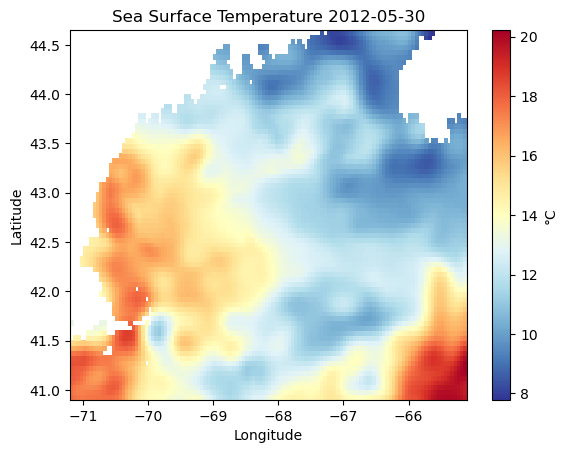

In [17]:
# Quick visualisation of one image for the whole area:

day = 8186; # the day u will plot

pcolor(lon, lat, sst_full[:,:,day]',cmap="RdYlBu_r"); colorbar(label="°C");
title("Sea Surface Temperature $(Date(time[day]))");
xlabel("Longitude");
ylabel("Latitude");

In [11]:
#let's see the lon and Lat values
@show lon
@show lat

lon = Float32[-71.175, -71.125, -71.075005, -71.025, -70.975006, -70.925, -70.875, -70.825005, -70.775, -70.725006, -70.675, -70.625, -70.575005, -70.525, -70.475006, -70.425, -70.375, -70.325005, -70.275, -70.225006, -70.175, -70.125, -70.075005, -70.025, -69.975006, -69.925, -69.875, -69.825005, -69.775, -69.725006, -69.675, -69.625, -69.575005, -69.525, -69.475006, -69.425, -69.375, -69.325005, -69.275, -69.225006, -69.175, -69.125, -69.075005, -69.025, -68.975006, -68.925, -68.875, -68.825005, -68.775, -68.725006, -68.675, -68.625, -68.575005, -68.525, -68.475006, -68.425, -68.375, -68.325005, -68.275, -68.225006, -68.175, -68.125, -68.075005, -68.025, -67.975006, -67.925, -67.875, -67.825005, -67.775, -67.725006, -67.675, -67.625, -67.575005, -67.525, -67.475, -67.425, -67.375, -67.325005, -67.275, -67.225, -67.175, -67.125, -67.075005, -67.025, -66.975, -66.925, -66.875, -66.825005, -66.775, -66.725, -66.675, -66.625, -66.575005, -66.525, -66.475, -66.425, -66.375, -66.325005, -6

75-element Vector{Float32}:
 40.925
 40.975
 41.024998
 41.075
 41.125
 41.175
 41.225
 41.274998
 41.325
 41.375
 41.425
 41.475
 41.524998
  ⋮
 44.075
 44.125
 44.175
 44.225
 44.274998
 44.325
 44.375
 44.425
 44.475
 44.524998
 44.575
 44.625

In [13]:
#time series of SST at prefered point:

# Method 1 using the lon, lat values 
# put ur lon and lat
x = convert(Float32,-71.175); #longitude value
y = convert(Float32,40.925); #latitude value

# extract the data
xx = findfirst(==(x), lon)
yy = findfirst(==(y), lat)

sst_in = sst_full[xx,yy,:];

# Method 2 using the lon, lat locations in the vector (x,y) 
#sst_out = sst_full[1,1,:];

In [43]:
#time series of SST at prefered point:

# Method 1 using the lon, lat values 
# put ur lon and lat
x2 = convert(Float32,-65.425); #longitude value
y2 = convert(Float32,44.325); #latitude value

# extract the data
xx2 = findfirst(==(x2), lon)
yy2 = findfirst(==(y2), lat)

sst_out = sst_full[xx2,yy2,:];

# Method 2 using the lon, lat locations in the vector (x,y) 
#sst_out = sst_full[1,1,:];

In [45]:
@show size(sst_full)

size(sst_full) = (122, 75, 11839)


(122, 75, 11839)

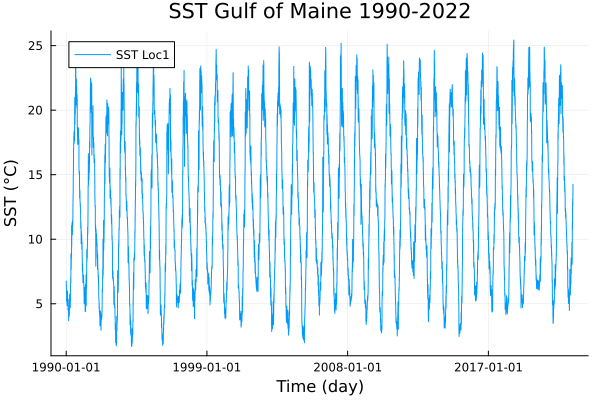

In [47]:
# TS plot for the SST at this location:
## for 1 location:

Plots.plot(time, sst_in, lab="SST Loc1")
title!("SST Gulf of Maine 1990-2022", fontsize=20)
xlabel!("Time (day)"); ylabel!("SST (°C)")

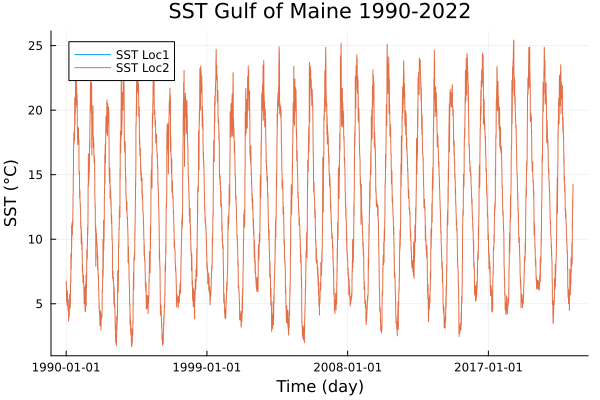

In [51]:
## For several locations at the same plot (To make a comparison)

Plots.plot(time, sst_in, lab="SST Loc1")
Plots.plot!(time, sst_out, lab="SST Loc2")
title!("SST Gulf of Maine 1990-2022", fontsize=20)
xlabel!("Time (day)"); ylabel!("SST (°C)")

In [35]:
# MHWs calculations:
## MHW dates:
sst_dates = Date(first(time)) : Date(last(time))
clim_dates = Date(first(time)) : Date(last(time))
mhw_dates = Date("1990-01-01") : Date("2022-05-31")

Date("1990-01-01"):Day(1):Date("2022-05-31")

In [37]:
# MHW for an area (3d data (lon, lat, time))

mhws_area = MarineHW(sst_full, sst_dates, mhw_dates, clim_dates; threshold=0.9);  

myclim = evclim(mhws_area);
mythresh = evthresh(mhws_area);
mhw_means = mhws_area[1].means;
mhw_annual = mhws_area[1].annuals;
mhw_trends = mhws_area[1].trends;
mhw_pval = mhws_area[1].pvalues;
@show size(myclim)
@show size(mythresh)

size(myclim) = (122, 75, 366)
size(mythresh) = (122, 75, 366)


(122, 75, 366)

In [38]:
## MHW Characteristics for the area:
# 1. Mean metrics
MHW_MIntmean = nomissing(mhw_means.meanint, NaN);
MHW_MIntmax = nomissing(mhw_means.maxint, NaN);
MHW_MIntcum = nomissing(mhw_means.cumint, NaN);
MHW_MFreq = nomissing(mhw_means.frequency, NaN);
MHW_MDur = nomissing(mhw_means.duration, NaN);
MHW_Mdays = nomissing(mhw_means.days, NaN);
MHW_Mronset = nomissing(mhw_means.ronset, NaN);
MHW_Mrdecline = nomissing(mhw_means.rdecline, NaN);

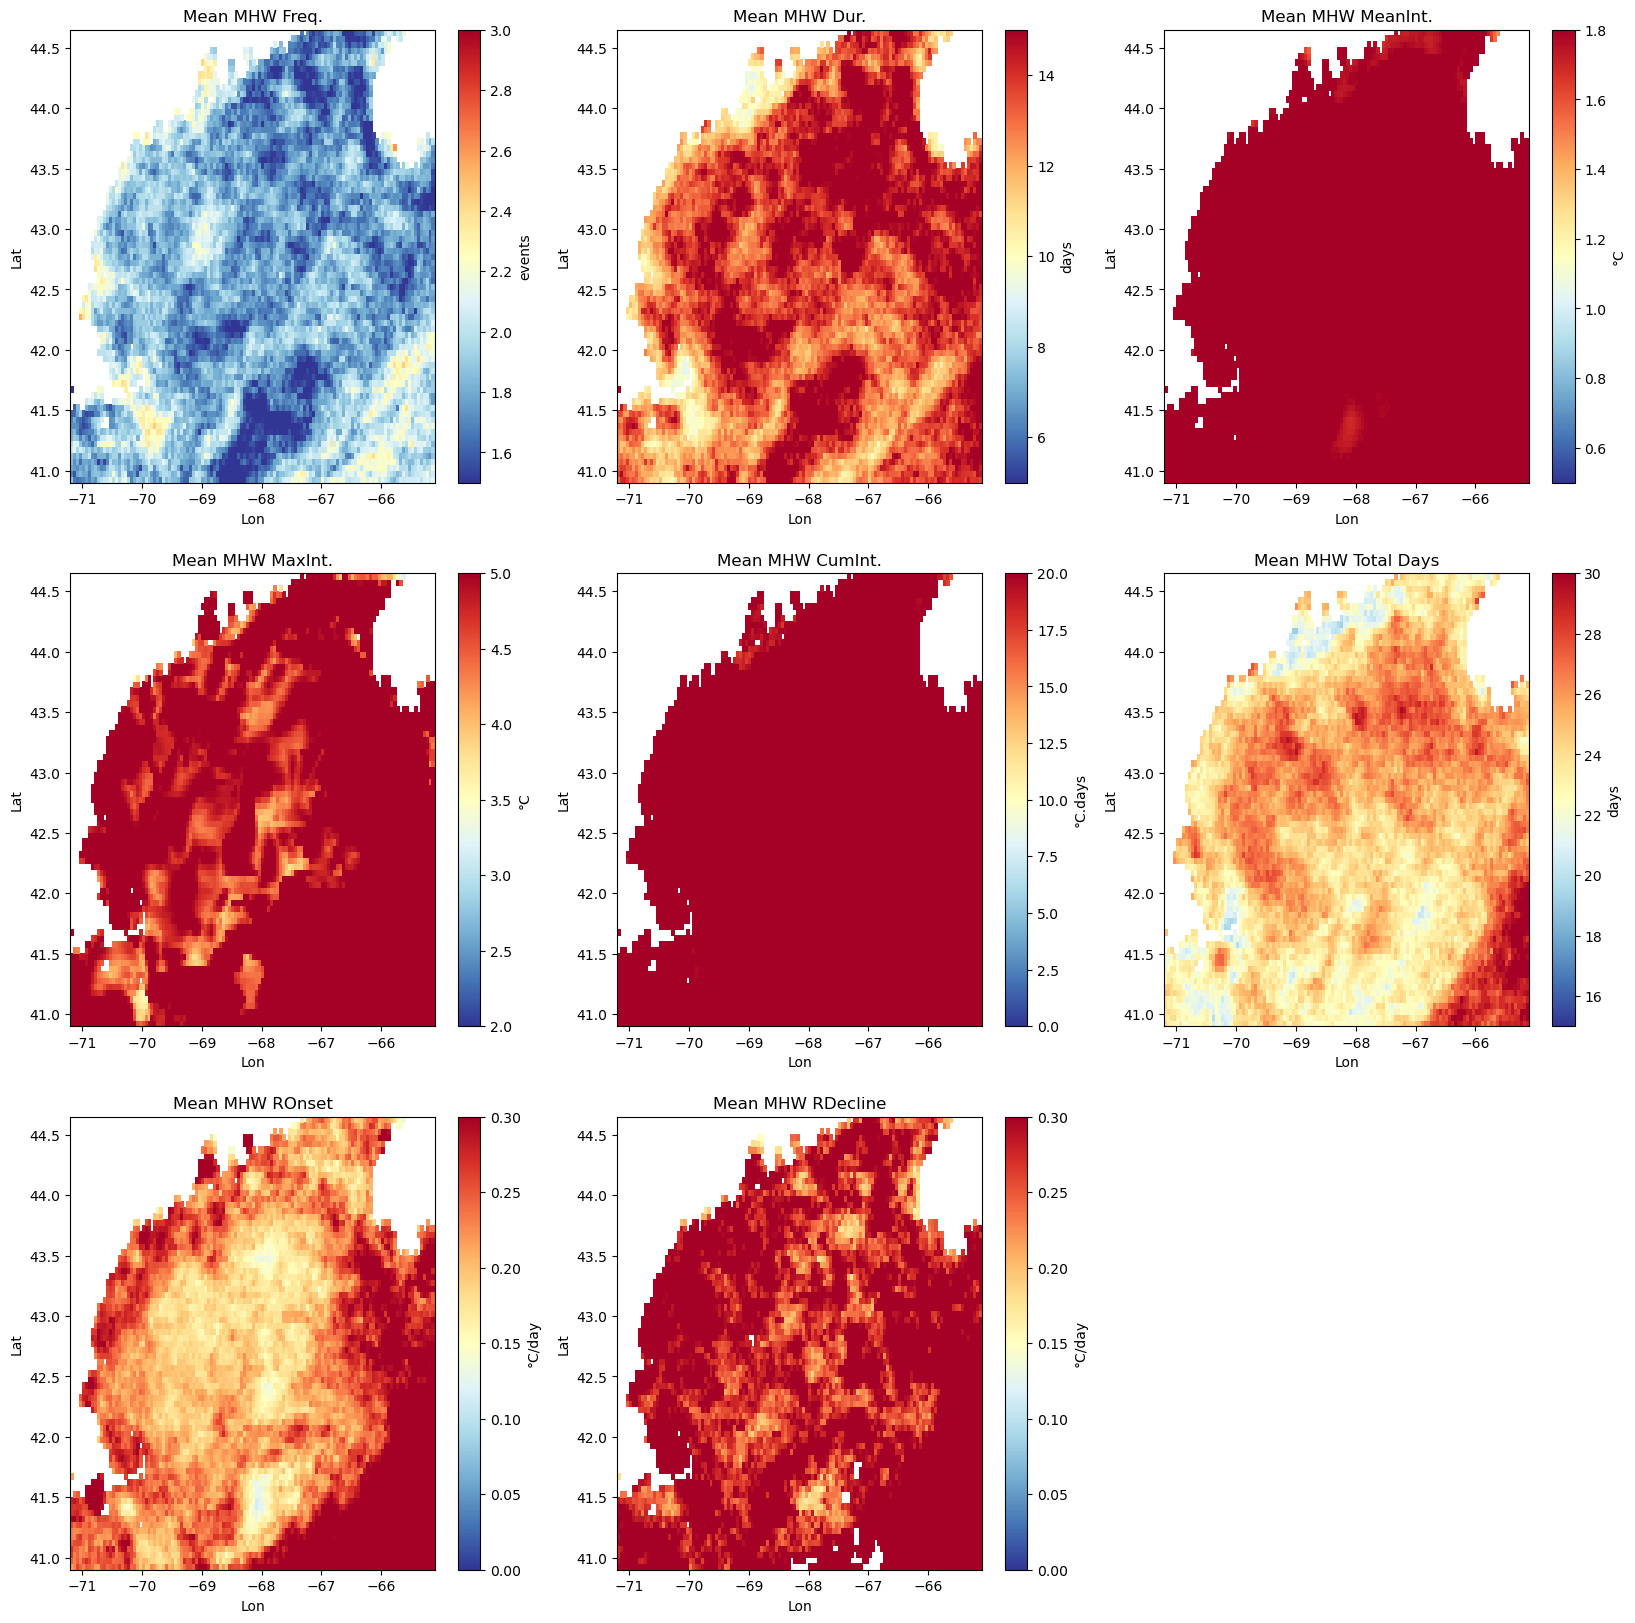

In [41]:
# plot mean characteristics:

pd = 0.1
figure(figsize=(20,20))
subplot(3,3,1)
pcolor(lon, lat, MHW_MFreq',cmap="RdYlBu_r"); colorbar(label="events");
title("Mean MHW Freq."); xlabel("Lon"); ylabel("Lat"); clim(1.5,3);
subplot(3,3,2)
pcolor(lon, lat, MHW_MDur',cmap="RdYlBu_r"); colorbar(label="days");
title("Mean MHW Dur."); xlabel("Lon"); ylabel("Lat"); clim(5,15);
subplot(3,3,3)
pcolor(lon, lat, MHW_MIntmean',cmap="RdYlBu_r"); colorbar(label="°C");
title("Mean MHW MeanInt."); xlabel("Lon"); ylabel("Lat"); clim(0.5,1.8);
subplot(3,3,4)
pcolor(lon, lat, MHW_MIntmax',cmap="RdYlBu_r"); colorbar(label="°C");
title("Mean MHW MaxInt."); xlabel("Lon"); ylabel("Lat"); clim(2,5);
subplot(3,3,5)
pcolor(lon, lat, MHW_MIntcum',cmap="RdYlBu_r"); colorbar(label="°C.days");
title("Mean MHW CumInt."); xlabel("Lon"); ylabel("Lat"); clim(0,20);
subplot(3,3,6)
pcolor(lon, lat, MHW_Mdays',cmap="RdYlBu_r"); colorbar(label="days");
title("Mean MHW Total Days"); xlabel("Lon"); ylabel("Lat"); clim(15,30);
subplot(3,3,7)
pcolor(lon, lat, MHW_Mronset',cmap="RdYlBu_r"); colorbar(label="°C/day");
title("Mean MHW ROnset"); xlabel("Lon"); ylabel("Lat"); clim(0.0,0.3);
subplot(3,3,8)
pcolor(lon, lat, MHW_Mrdecline',cmap="RdYlBu_r"); colorbar(label="°C/day");
title("Mean MHW RDecline"); xlabel("Lon"); ylabel("Lat"); clim(0.0,0.3);

In [53]:
## MHW Characteristics for the area:
# 1. metrics trends
MHW_TIntmean = nomissing(mhw_trends.meanint, NaN);
MHW_TIntmax = nomissing(mhw_trends.maxint, NaN);
MHW_TIntcum = nomissing(mhw_trends.cumint, NaN);
MHW_TFreq = nomissing(mhw_trends.frequency, NaN);
MHW_TDur = nomissing(mhw_trends.duration, NaN);
MHW_Tdays = nomissing(mhw_trends.days, NaN);
MHW_Tronset = nomissing(mhw_trends.ronset, NaN);
MHW_Trdecline = nomissing(mhw_trends.rdecline, NaN);

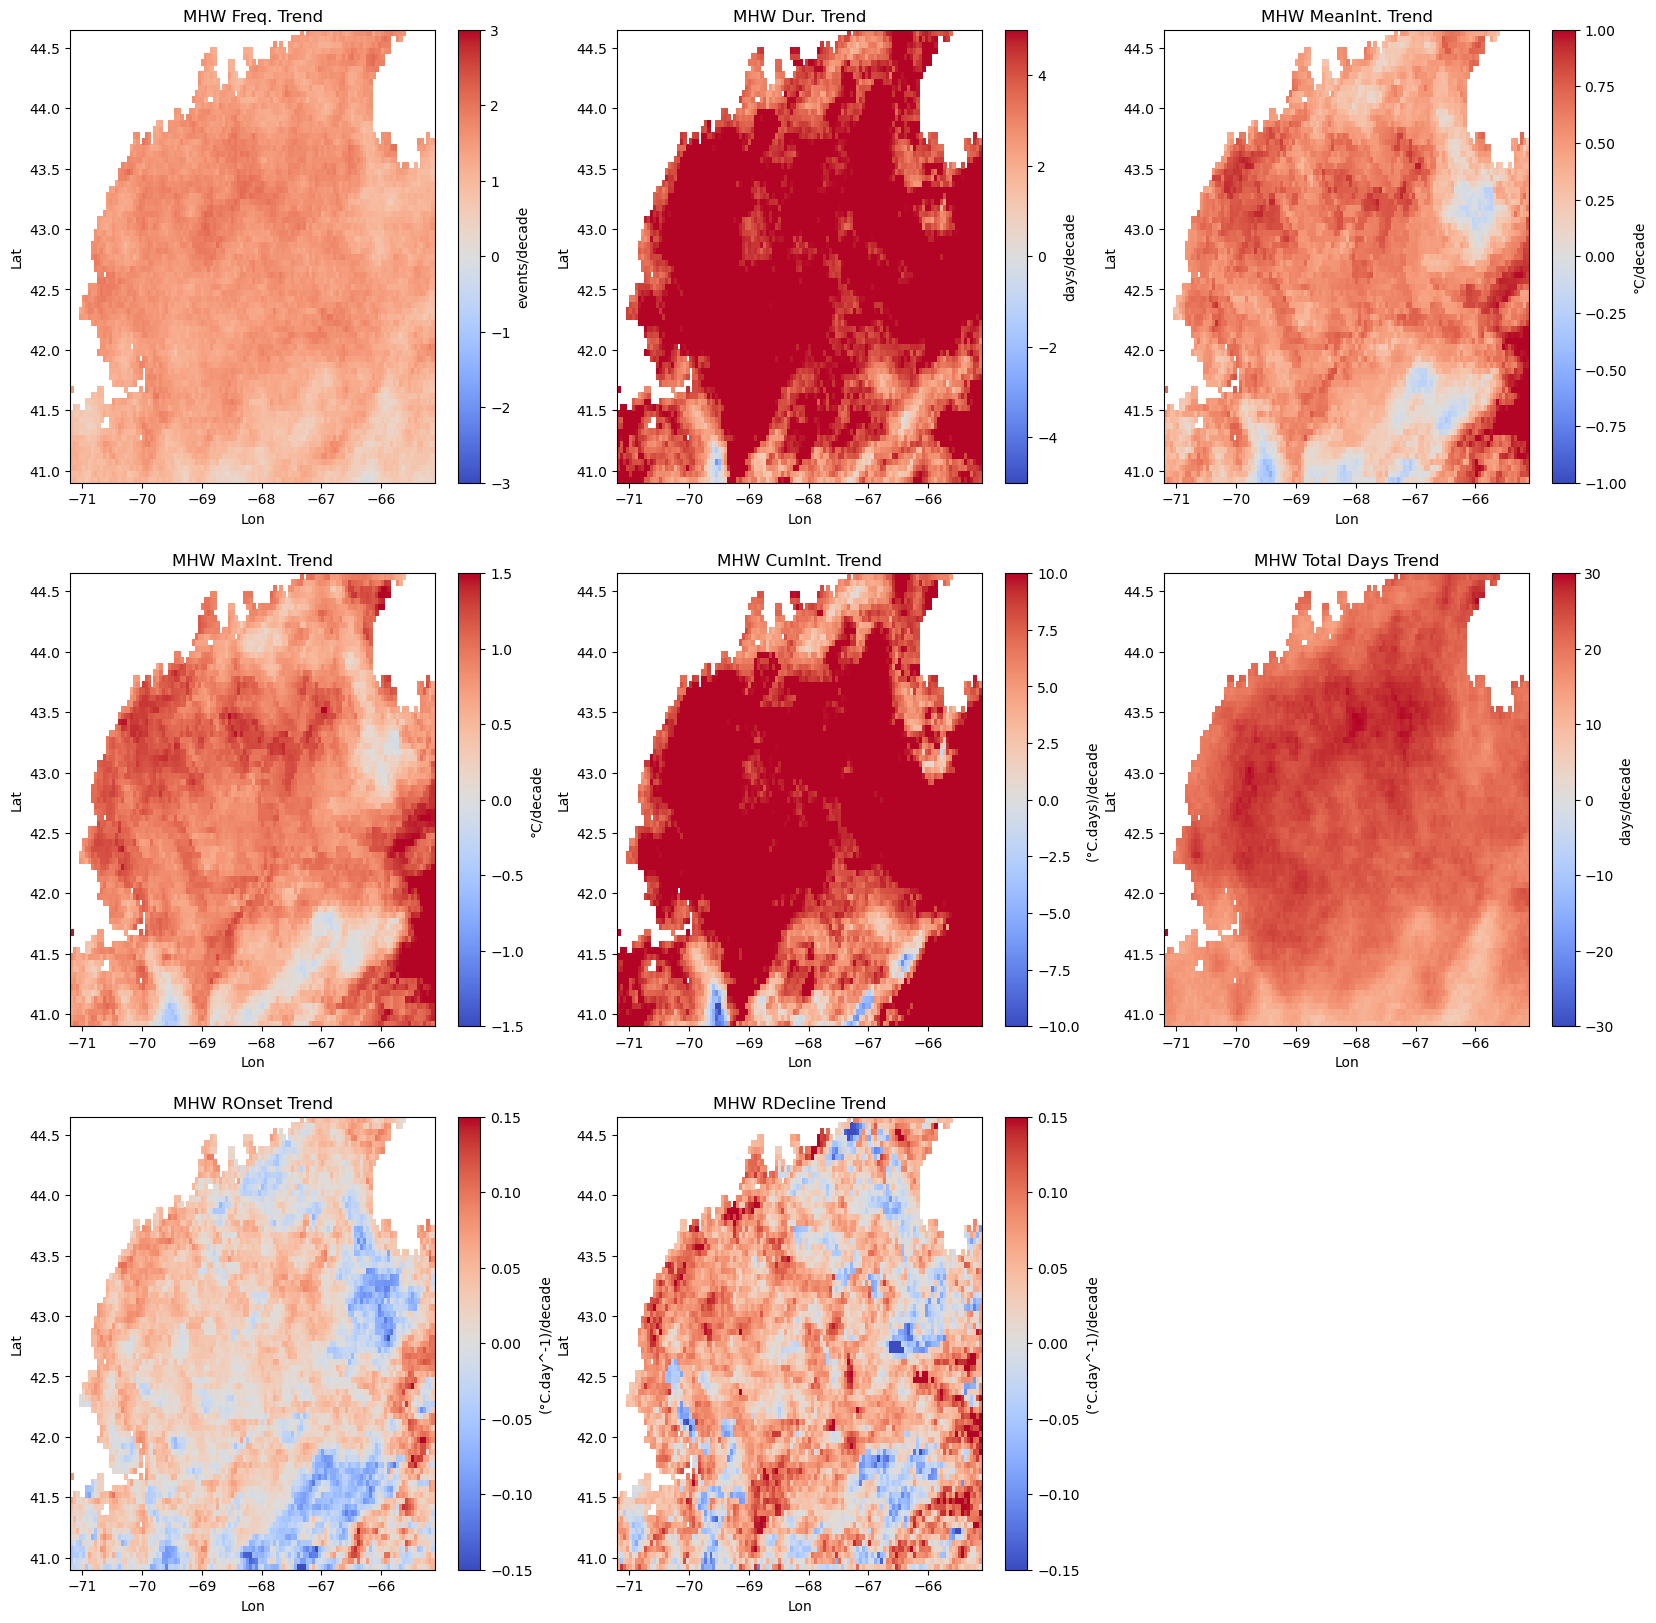

In [55]:
# plot mean characteristics:

pd = 0.1
figure(figsize=(20,20))
subplot(3,3,1)
pcolor(lon, lat, (MHW_TFreq.*10)',cmap="coolwarm"); colorbar(label="events/decade");
title("MHW Freq. Trend"); xlabel("Lon"); ylabel("Lat"); clim(-3,3);
subplot(3,3,2)
pcolor(lon, lat, (MHW_TDur.*10)',cmap="coolwarm"); colorbar(label="days/decade");
title("MHW Dur. Trend"); xlabel("Lon"); ylabel("Lat"); clim(-5,5);
subplot(3,3,3)
pcolor(lon, lat, (MHW_TIntmean.*10)',cmap="coolwarm"); colorbar(label="°C/decade");
title("MHW MeanInt. Trend"); xlabel("Lon"); ylabel("Lat"); clim(-1,1);
subplot(3,3,4)
pcolor(lon, lat, (MHW_TIntmax.*10)',cmap="coolwarm"); colorbar(label="°C/decade");
title("MHW MaxInt. Trend"); xlabel("Lon"); ylabel("Lat"); clim(-1.5,1.5);
subplot(3,3,5)
pcolor(lon, lat, (MHW_TIntcum.*10)',cmap="coolwarm"); colorbar(label="(°C.days)/decade");
title("MHW CumInt. Trend"); xlabel("Lon"); ylabel("Lat"); clim(-10,10);
subplot(3,3,6)
pcolor(lon, lat, (MHW_Tdays.*10)',cmap="coolwarm"); colorbar(label="days/decade");
title("MHW Total Days Trend"); xlabel("Lon"); ylabel("Lat"); clim(-30,30);
subplot(3,3,7)
pcolor(lon, lat, (MHW_Tronset.*10)',cmap="coolwarm"); colorbar(label="(°C.day^-1)/decade");
title("MHW ROnset Trend"); xlabel("Lon"); ylabel("Lat"); clim(-0.15,0.15);
subplot(3,3,8)
pcolor(lon, lat, (MHW_Trdecline.*10)',cmap="coolwarm"); colorbar(label="(°C.day^-1)/decade");
title("MHW RDecline Trend"); xlabel("Lon"); ylabel("Lat"); clim(-0.15,0.15);

In [56]:
# Annual metrics (for Loc 1)
MHW_AIntmean_in = nomissing(mhw_annual.meanint[xx,yy,:], NaN);
MHW_AIntmax_in = nomissing(mhw_annual.maxint[xx,yy,:], NaN);
MHW_AIntcum_in = nomissing(mhw_annual.cumint[xx,yy,:], NaN);
MHW_AFreq_in = nomissing(mhw_annual.frequency[xx,yy,:], NaN);
MHW_ADur_in = nomissing(mhw_annual.duration[xx,yy,:], NaN);
MHW_Adays_in = nomissing(mhw_annual.days[xx,yy,:], NaN);
MHW_Aronset_in = nomissing(mhw_annual.ronset[xx,yy,:], NaN);
MHW_Ardecline_in = nomissing(mhw_annual.rdecline[xx,yy,:], NaN);

# Annual metrics (for Loc 2)
MHW_AIntmean_out = nomissing(mhw_annual.meanint[10,38,:], NaN);
MHW_AIntmax_out = nomissing(mhw_annual.maxint[10,38,:], NaN);
MHW_AIntcum_out = nomissing(mhw_annual.cumint[10,38,:], NaN);
MHW_AFreq_out = nomissing(mhw_annual.frequency[10,38,:], NaN);
MHW_ADur_out = nomissing(mhw_annual.duration[10,38,:], NaN);
MHW_Adays_out = nomissing(mhw_annual.days[10,38,:], NaN);
MHW_Aronset_out = nomissing(mhw_annual.ronset[10,38,:], NaN);
MHW_Ardecline_out = nomissing(mhw_annual.rdecline[10,38,:], NaN);

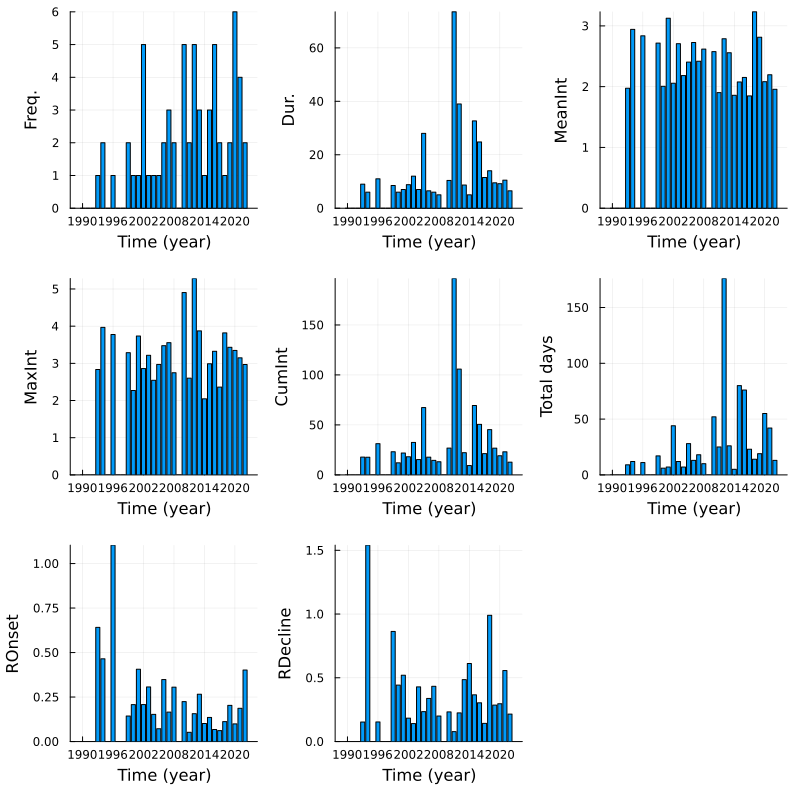

In [59]:
# plot annual metrics Loc 1

y = 1990:2022;
p1 = Plots.bar(y, MHW_AFreq_in, xlabel = "Time (year)", ylabel = "Freq.", xticks = 1990:6:2022)
p2 = Plots.bar(y, MHW_ADur_in, xlabel = "Time (year)", ylabel = "Dur.", xticks = 1990:6:2022)
p3 = Plots.bar(y, MHW_AIntmean_in, xlabel = "Time (year)", ylabel = "MeanInt", xticks = 1990:6:2022)
p4 = Plots.bar(y, MHW_AIntmax_in, xlabel = "Time (year)", ylabel = "MaxInt", xticks = 1990:6:2022)
p5 = Plots.bar(y, MHW_AIntcum_in, xlabel = "Time (year)", ylabel = "CumInt", xticks = 1990:6:2022)
p6 = Plots.bar(y, MHW_Adays_in, xlabel = "Time (year)", ylabel = "Total days", xticks = 1990:6:2022)
p7 = Plots.bar(y, MHW_Aronset_in, xlabel = "Time (year)", ylabel = "ROnset", xticks = 1990:6:2022)
p8 = Plots.bar(y, MHW_Ardecline_in, xlabel = "Time (year)", ylabel = "RDecline", xticks = 1990:6:2022)
Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(3,3), widths=(4/8,4/8), size=(800,800), legend=false) 

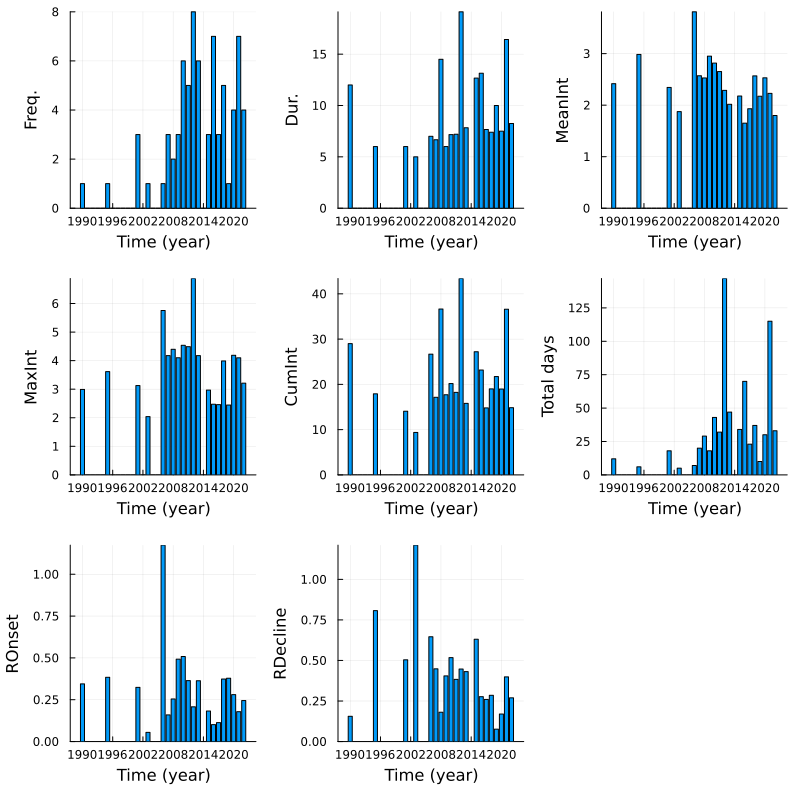

In [60]:
# plot annual metrics Loc 2

y = 1990:2022;
p1 = Plots.bar(y, MHW_AFreq_out, xlabel = "Time (year)", ylabel = "Freq.", xticks = 1990:6:2022)
p2 = Plots.bar(y, MHW_ADur_out, xlabel = "Time (year)", ylabel = "Dur.", xticks = 1990:6:2022)
p3 = Plots.bar(y, MHW_AIntmean_out, xlabel = "Time (year)", ylabel = "MeanInt", xticks = 1990:6:2022)
p4 = Plots.bar(y, MHW_AIntmax_out, xlabel = "Time (year)", ylabel = "MaxInt", xticks = 1990:6:2022)
p5 = Plots.bar(y, MHW_AIntcum_out, xlabel = "Time (year)", ylabel = "CumInt", xticks = 1990:6:2022)
p6 = Plots.bar(y, MHW_Adays_out, xlabel = "Time (year)", ylabel = "Total days", xticks = 1990:6:2022)
p7 = Plots.bar(y, MHW_Aronset_out, xlabel = "Time (year)", ylabel = "ROnset", xticks = 1990:6:2022)
p8 = Plots.bar(y, MHW_Ardecline_out, xlabel = "Time (year)", ylabel = "RDecline", xticks = 1990:6:2022)
Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(3,3), widths=(4/8,4/8), size=(800,800), legend=false) 

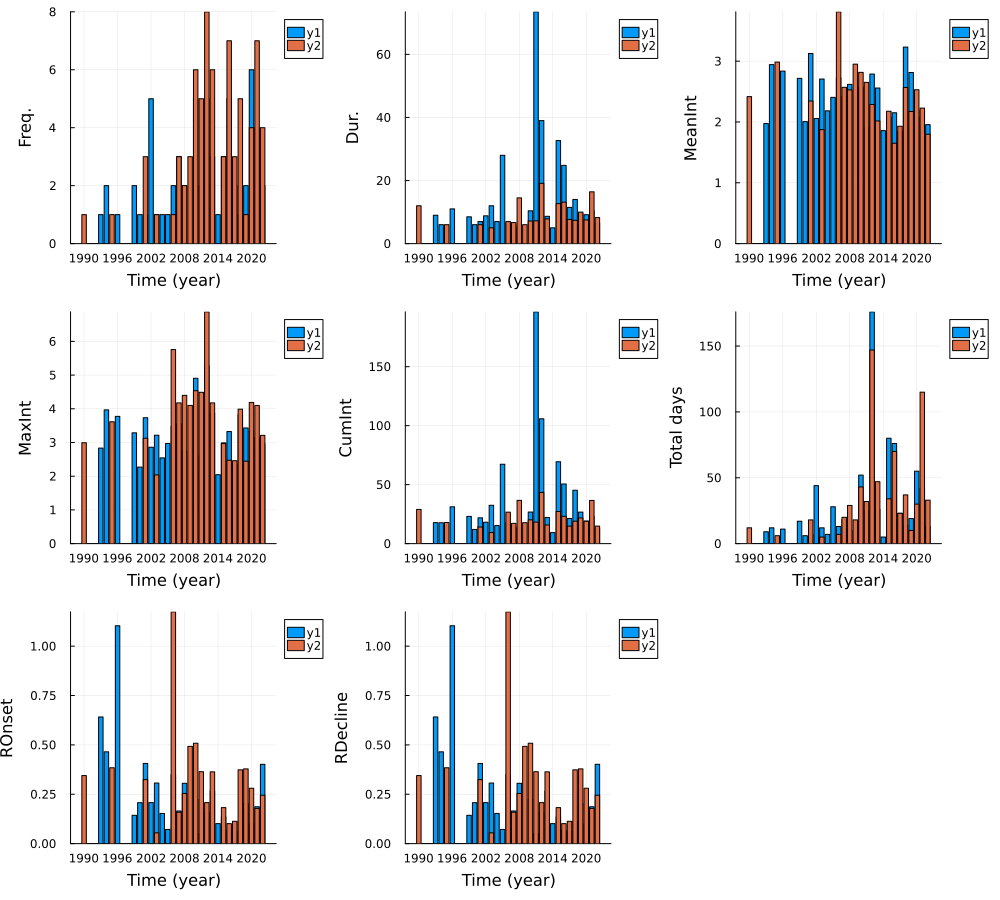

In [63]:
# Compare annual metrics Loc 1 & Loc 2

y = 1990:2022;

pd = 0.1

figure(figsize=(20,20))

p1 = Plots.bar(y, MHW_AFreq_in, xlabel = "Time (year)", ylabel = "Freq.", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_AFreq_out)
p2 = Plots.bar(y, MHW_ADur_in, xlabel = "Time (year)", ylabel = "Dur.", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_ADur_out)
p3 = Plots.bar(y, MHW_AIntmean_in, xlabel = "Time (year)", ylabel = "MeanInt", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_AIntmean_out)
p4 = Plots.bar(y, MHW_AIntmax_in, xlabel = "Time (year)", ylabel = "MaxInt", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_AIntmax_out)
p5 = Plots.bar(y, MHW_AIntcum_in, xlabel = "Time (year)", ylabel = "CumInt", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_AIntcum_out)
p6 = Plots.bar(y, MHW_Adays_in, xlabel = "Time (year)", ylabel = "Total days", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_Adays_out)
p7 = Plots.bar(y, MHW_Aronset_in, xlabel = "Time (year)", ylabel = "ROnset", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_Aronset_out)
p8 = Plots.bar(y, MHW_Aronset_in, xlabel = "Time (year)", ylabel = "RDecline", xticks = 1990:6:2022)
     Plots.bar!(y, MHW_Aronset_out)


Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(3,3), widths=(6/8,6/8), size=(1000,900), legend=:outertopright, grid =true) 
